# Visualizing The Third Numeric Variable in Python

This is a notebook for this medium article: https://medium.com/@sajjadahmadi/visualizing-the-third-numeric-variable-in-python-eaf73f42219

If you want a clear explanation of this topic, please check out the article, thank you very much for your time and attention.

## Data Prepration for Scatter Charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('E:/Experiment/Deneb Experiment/Students Performance in Exams/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data_students = data.loc[:,['math score', 'reading score', 'writing score']]
data_students.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


### Scatter Chart, Third Variable as Gradient

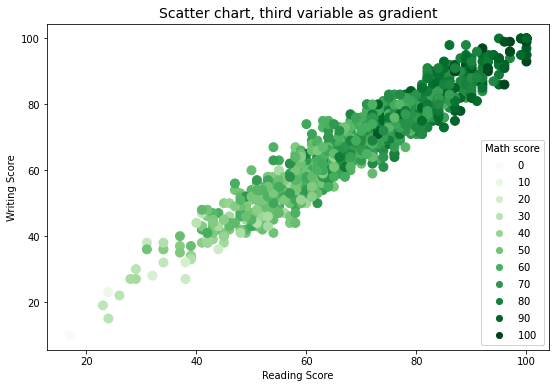

In [5]:
x = data_students['reading score']
y = data_students['writing score']
z = data_students['math score']

fig, ax = plt.subplots( figsize = (9,6))

scatter = ax.scatter(x, y, c = z , cmap = 'Greens' , s = 80)
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Math score")
ax.add_artist(legend)
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')
ax.set_title('Scatter chart, third variable as gradient', size = 14)
plt.show()


### Scatter Chart, Third Variable as Different marker sizes

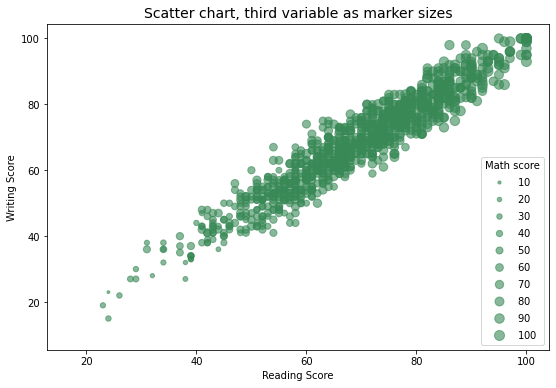

In [6]:
fig, ax = plt.subplots( figsize = (9,6) )

scatter = ax.scatter(x, y, c = '#388956', s = z,  alpha=0.6)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6 , color = '#388956')
legend = ax.legend(handles, labels, loc="lower right", title="Math score" )
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')
ax.set_title('Scatter chart, third variable as marker sizes', size = 14)
plt.show()


## Data Prepration for Line Charts

In [7]:
df_house = pd.read_csv('E:/Experiment/Deneb Experiment/House Prices - Advanced Regression Techniques/train.csv')

In [8]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_house = df_house.loc[ :,
                ['YearBuilt', 'SalePrice' ,'LotArea'] ]

df_house.describe()

,YearBuilt,SalePrice,LotArea
count,1460.000000,1460.000000,1460.000000
mean,1971.267808,180921.195890,10516.828082
std,30.202904,79442.502883,9981.264932
min,1872.000000,34900.000000,1300.000000
25%,1954.000000,129975.000000,7553.500000
50%,1973.000000,163000.000000,9478.500000
75%,2000.000000,214000.000000,11601.500000
max,2010.000000,755000.000000,215245.000000


In [10]:
# Based on above values we can realize that the data is skewed and we have to remove outliers

s_low = df_house['SalePrice'].quantile(0.05)
s_hi = df_house['SalePrice'].quantile(0.95)

l_low  = df_house['LotArea'].quantile(0.05)
l_hi  = df_house['LotArea'].quantile(0.95)


df_house_trimmed = df_house[(df_house["SalePrice"] > s_low) & (df_house["SalePrice"] < s_hi) & 
                            (df_house["LotArea"] > l_low) & (df_house["LotArea"] < l_hi) ]

In [11]:
df_house_trimmed.describe()

,YearBuilt,SalePrice,LotArea
count,1191.000000,1191.000000,1191.000000
mean,1971.174643,174156.529807,9557.555835
std,29.740441,54519.643515,2717.921274
min,1872.000000,89000.000000,3316.000000
25%,1954.000000,132750.000000,7819.500000
50%,1973.000000,162000.000000,9450.000000
75%,2000.000000,206150.000000,11200.000000
max,2009.000000,326000.000000,17400.000000


In [12]:
d = {'SalePrice':'Sale price $', 'LotArea':'Average square feet'}

df_avg_year = df_house_trimmed.groupby('YearBuilt').agg({'SalePrice':'mean','LotArea':'mean'}).rename(columns=d)

df_avg_year.head()

,Sale price $,Average square feet
YearBuilt,,
1872,122000.000000,5250.0
1875,94000.000000,6342.0
1880,169159.666667,10200.0
1885,111250.000000,11070.0
1890,142200.000000,9810.0


In [13]:
df_avg_year.min()

Sale price $           90350.0
Average square feet     4280.0
dtype: float64

In [14]:
df_avg_year.max()

Sale price $           325000.0
Average square feet     13500.0
dtype: float64

### Line Chart, Third Variable as Gradient

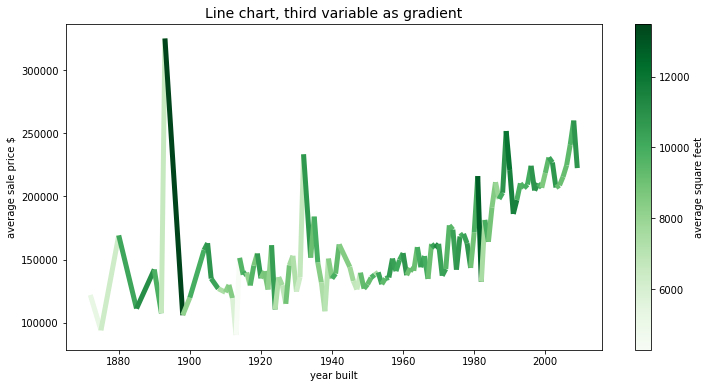

In [37]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = df_avg_year.index 
y = df_avg_year['Sale price $']
z = df_avg_year['Average square feet']

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig, ax = plt.subplots( figsize = (12 , 6))

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(z.min(), z.max())
lc = LineCollection(segments, cmap='Greens', norm=norm)
lc.set_array(z)
lc.set_linewidth(5)
ax.add_collection(lc)

ax.autoscale()
fig.colorbar( lc, ax= ax, label='average square feet')
ax.set_xlabel('year built', size = 10)
ax.set_ylabel('average sale price $', size = 10)
ax.set_title('Line chart, third variable as gradient', size = 14)

plt.sci(lc)
plt.show()


### Line Chart, Third Variable as Different LineWidths

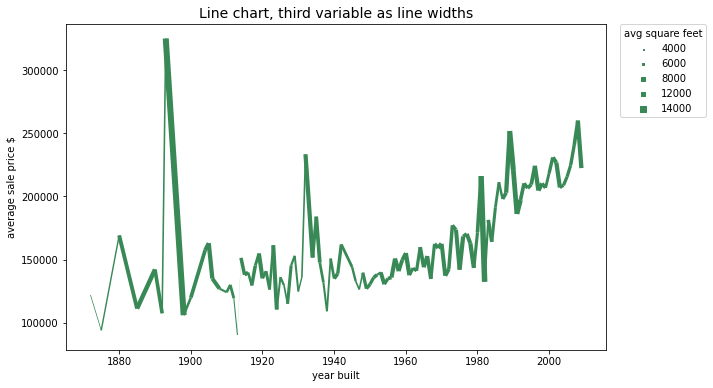

In [36]:
x = df_avg_year.index 
y = df_avg_year['Sale price $']
z = df_avg_year['Average square feet']

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

#I used this formula for normalization of datapoints to 0.1 to 6
#https://stats.stackexchange.com/questions/286270/how-to-normalize-rating-in-scale-of-1-to-5
z = ((6 - 0.1) / (z.max() - z.min())) * (z - z.max()) + 6

fig, ax = plt.subplots(figsize = (12 , 6))

for (width, label) in zip([1, 8, 15, 22 , 29], [4000, 6000, 8000, 12000, 14000 ]):
    ax.scatter( [], [], marker = 's' ,c='#388956', s=width, 
               label= label  )
    
lc = LineCollection(segments, linewidths= z, color ='#388956' )
lc.set_array(z)
ax.add_collection(lc)
ax.autoscale()

fig.subplots_adjust(right=0.75)

ax.legend(
    scatterpoints=1,  title='avg square feet',
    loc="upper left",
    bbox_to_anchor=(0.76, 0.89),
    bbox_transform=fig.transFigure 
       ) 

ax.set_xlabel('year built', size = 10)
ax.set_ylabel('average sale price $' , size = 10 )
ax.set_title('Line chart, third variable as line widths', size = 14)

plt.show()


## HexBin Chart

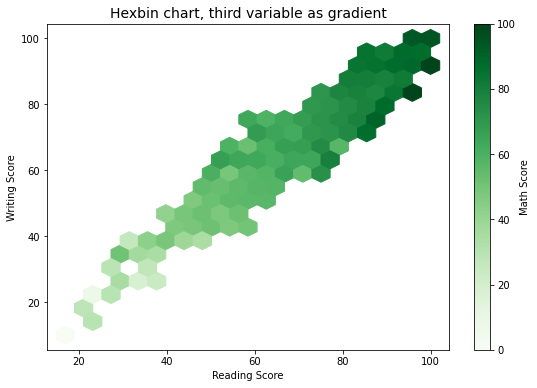

In [17]:
x = data_students['reading score']
y = data_students['writing score']
z = data_students['math score']

fig, ax = plt.subplots(figsize=(9, 6))

hexbin = ax.hexbin( x= x, y= y, C= z, gridsize = 20,
                         cmap = 'Greens' 
                  )
                       
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')

cb = fig.colorbar(hexbin, ax=ax, label='Math Score')

ax.set_title('Hexbin chart, third variable as gradient', size = 14)

plt.show()

## Contour Charts or HexBin, Third Variable as density or Number of records

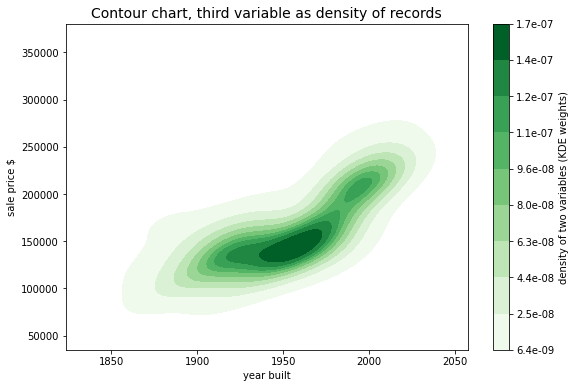

In [18]:
fig, ax = plt.subplots(figsize=(9, 6))

contour = sns.kdeplot( data= df_avg_year, x= df_avg_year.index , y='Sale price $',
                       cmap = "Greens" , fill = True,  cbar = True,
                       cbar_kws={'label': 'density of two variables (KDE weights)',  "format":"{x:.1e}" } ) 

ax.set_title('Contour chart, third variable as density of records', size = 14)
ax.set_xlabel('year built', size = 10)
ax.set_ylabel('sale price $', size = 10)

plt.show()

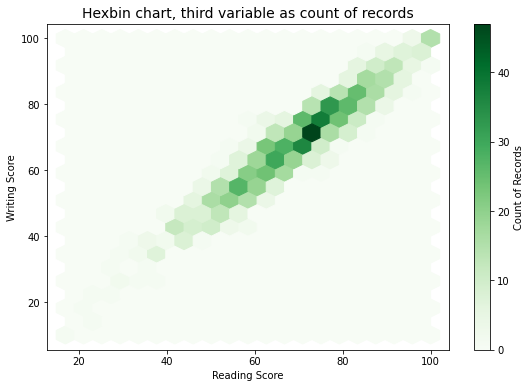

In [19]:
x = data_students['reading score']
y = data_students['writing score']
z = data_students['math score']

fig, ax = plt.subplots(figsize=(9, 6))

hexbin = ax.hexbin( x= x, y= y, gridsize = 20,
                         cmap = 'Greens' 
                  )
                       
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')

cb = fig.colorbar(hexbin, ax=ax, label='Count of Records')

ax.set_title('Hexbin chart, third variable as count of records', size = 14)

plt.show()

## MultiCoored Bar Chart

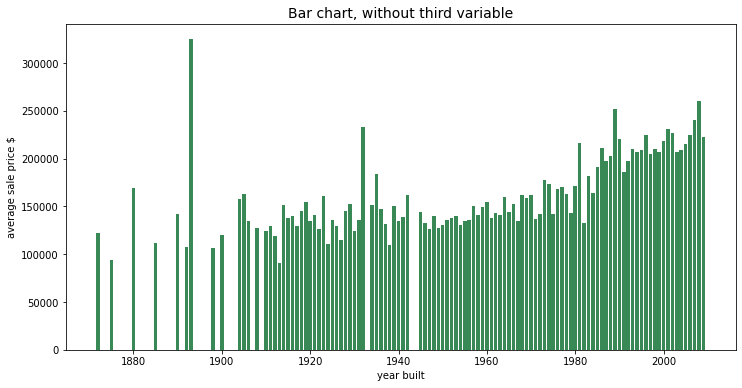

In [20]:
x = df_avg_year.index 
y = df_avg_year['Sale price $']
z = df_avg_year['Average square feet']

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar( x, y , color ='#388956' )

ax.set_title('Bar chart, without third variable', size = 14)
ax.set_xlabel('year built', size = 10)
ax.set_ylabel('average sale price $', size = 10) 

plt.show()

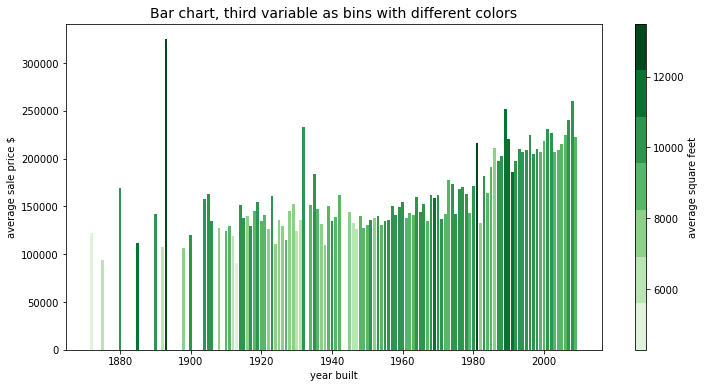

In [34]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

cmap = plt.cm.get_cmap('Greens')
rgba=[]
for i in np.arange(0.15, 1, 0.14):
    rgba.append( cmap(i) )
    
rgb = ['#d8f9c6', '#b1f28e', '#8aec55', '#63e51c', '#4aae14', '#32760d']
#You can get colors from a colormap or you can create a list of desired colors, both ways are the same
#But Here at the end I used the rgba, colors from color map

fig, ax = plt.subplots(figsize=(12, 6))

for i,c in zip( range(4000, 13500 ,1400), rgba):
    data =  df_avg_year[(df_avg_year['Average square feet'] < i + 1400) & 
                        (df_avg_year['Average square feet'] >= i)]
    ax.bar( data.index, data['Sale price $'] , color = c)

cmap = (ListedColormap(rgba))
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap= cmap), ax=ax ,label='average square feet', aspect=30)

ax.set_title('Bar chart, third variable as bins with different colors', size = 14)
ax.set_xlabel('year built', size = 10)
ax.set_ylabel('average sale price $', size = 10) 

plt.show()  

## HeatMap

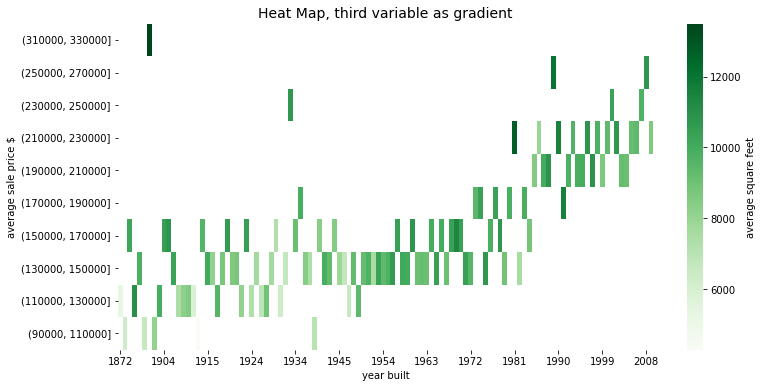

In [33]:
bins = [i for i in range(90000, 340000, 20000)]

df_avg_year['binned'] = pd.cut(df_avg_year['Sale price $'], bins=bins)
                                           
pivot_hprice = pd.pivot_table( df_avg_year, values= 'Average square feet', 
                             index=  'binned', columns= df_avg_year.index )

fig, ax = plt.subplots(figsize=(12, 6))

heatmap = sns.heatmap(pivot_hprice , 
                      cmap = "Greens",
                      xticklabels = 9,
                      cbar_kws={'label': 'average square feet'}
                     ) 


ax.set_title('Heat Map, third variable as gradient', size = 14)
ax.set_xlabel('year built', size = 10)
ax.set_ylabel('average sale price $', size = 10) 
ax.invert_yaxis()

plt.show()

# Thanks for reading

This is a notebook for this medium article: https://medium.com/@sajjadahmadi/visualizing-the-third-numeric-variable-in-python-eaf73f42219

If you want a clear explanation of this topic, please check out the article, thank you very much for your time and attention.